In [1]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = Image.open('camera_noise/1.JPG').convert('L')
img = np.array(img) & 1

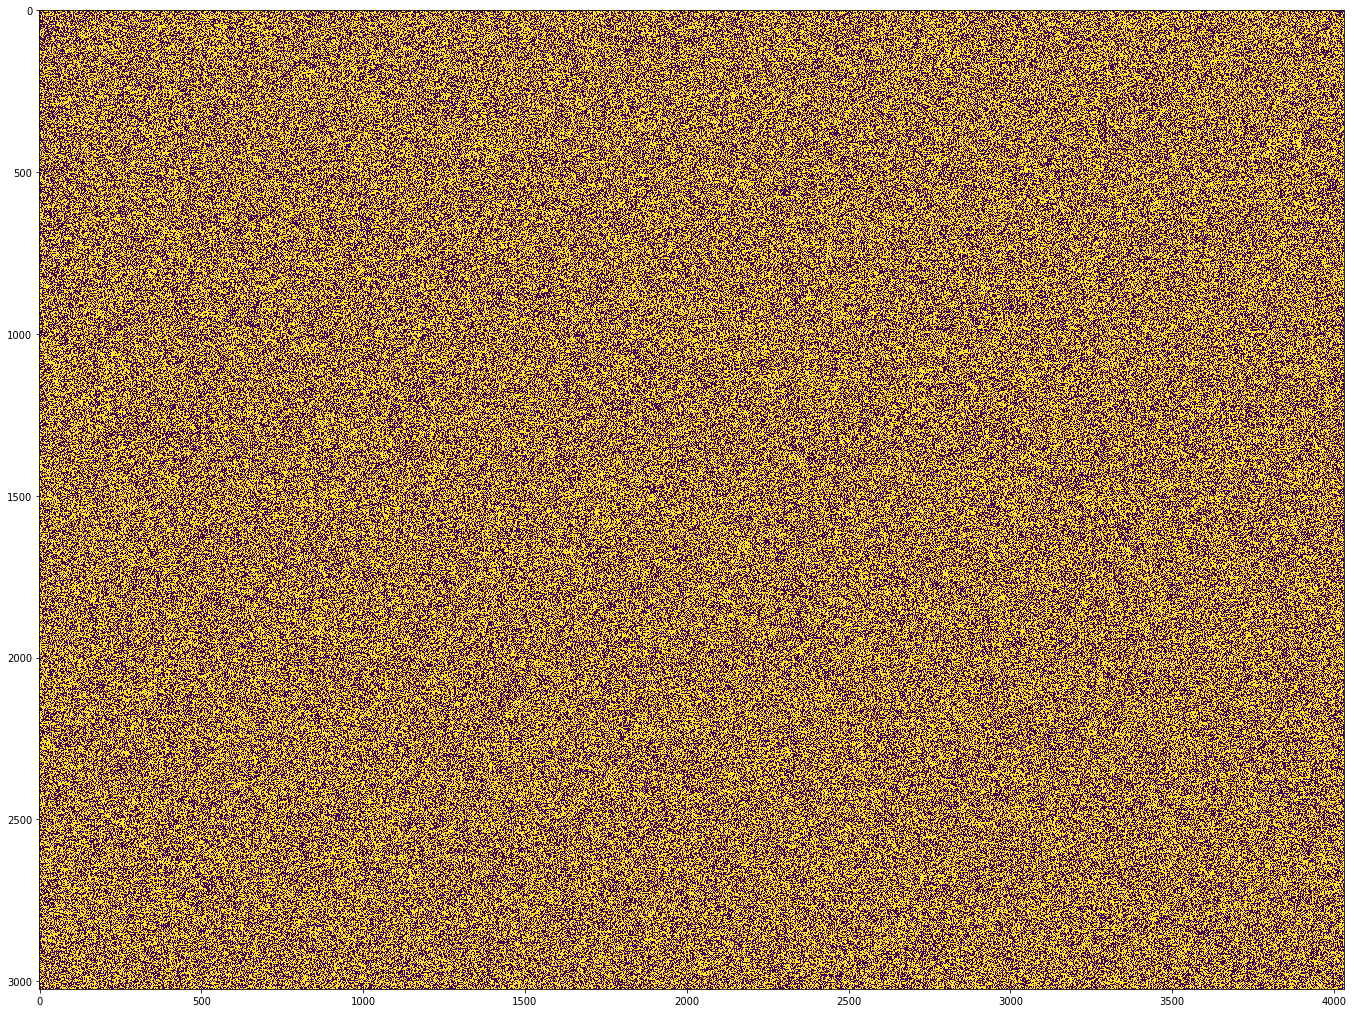

In [3]:
plt.figure(figsize=(24, 18))
plt.imshow(img)
plt.show()

In [36]:
def numpy_arrays_from_paths(filepaths, grayscale=False):
    frames = []
    for filepath in filepaths:
        img = Image.open(filepath)
        if grayscale:
            img = img.convert('L')
        data = np.array(img).astype(np.uint8)
        frames.append(data)
    return frames

In [37]:
calibration_pack = numpy_arrays_from_paths(['camera_noise/1.JPG',
                                            'camera_noise/2.JPG',
                                            'camera_noise/3.JPG',
                                            'camera_noise/4.JPG',
                                            'camera_noise/5.JPG',
                                            'camera_noise/6.JPG',
                                            'camera_noise/7.JPG',
                                            'camera_noise/8.JPG',
                                            'camera_noise/9.JPG',
                                            'camera_noise/10.JPG',
                                            'camera_noise/11.JPG',
                                            'camera_noise/12.JPG',
                                            'camera_noise/13.JPG',
                                           'camera_noise/14.JPG',
                                           'camera_noise/15.JPG',
                                           'camera_noise/16.JPG',
                                           'camera_noise/17.JPG',
                                           'camera_noise/18.JPG',
                                           'camera_noise/19.JPG',
                                           'camera_noise/20.JPG' ], grayscale=True)

In [43]:
import rawpy

In [46]:
rawpy.imread('camera_noise/1.DNG').raw_image

array([[547, 542, 536, ..., 523, 543, 534],
       [538, 535, 540, ..., 528, 532, 531],
       [586, 524, 555, ..., 536, 543, 531],
       ...,
       [527, 535, 527, ..., 528, 527, 528],
       [547, 545, 584, ..., 533, 539, 538],
       [554, 538, 524, ..., 538, 531, 538]], dtype=uint16)

In [47]:
calibration_pack = [rawpy.imread(f'camera_noise/{i}.DNG').raw_image for i in range(1, 11) ]

In [48]:
def unbiased_pixels(frames):
    frames = np.dstack(frames)
    mean_brightness = frames.mean(axis=2)
    std_brightness = frames.std(axis=2)
    
    noise = frames & 1
    mean_noise = noise.mean(axis=2)
    std_noise = np.std(noise, axis=2) / np.sqrt(len(frames))
    
    return mean_brightness, std_brightness, mean_noise

In [49]:
mb, sb, mn = unbiased_pixels(calibration_pack)
mb = mb.reshape(-1)
sb = sb.reshape(-1)
mn = mn.reshape(-1)

In [50]:
mb = np.random.choice(mb, 200000, replace=False)
sb = np.random.choice(sb, 200000, replace=False)
mn = np.random.choice(mn, 200000, replace=False)

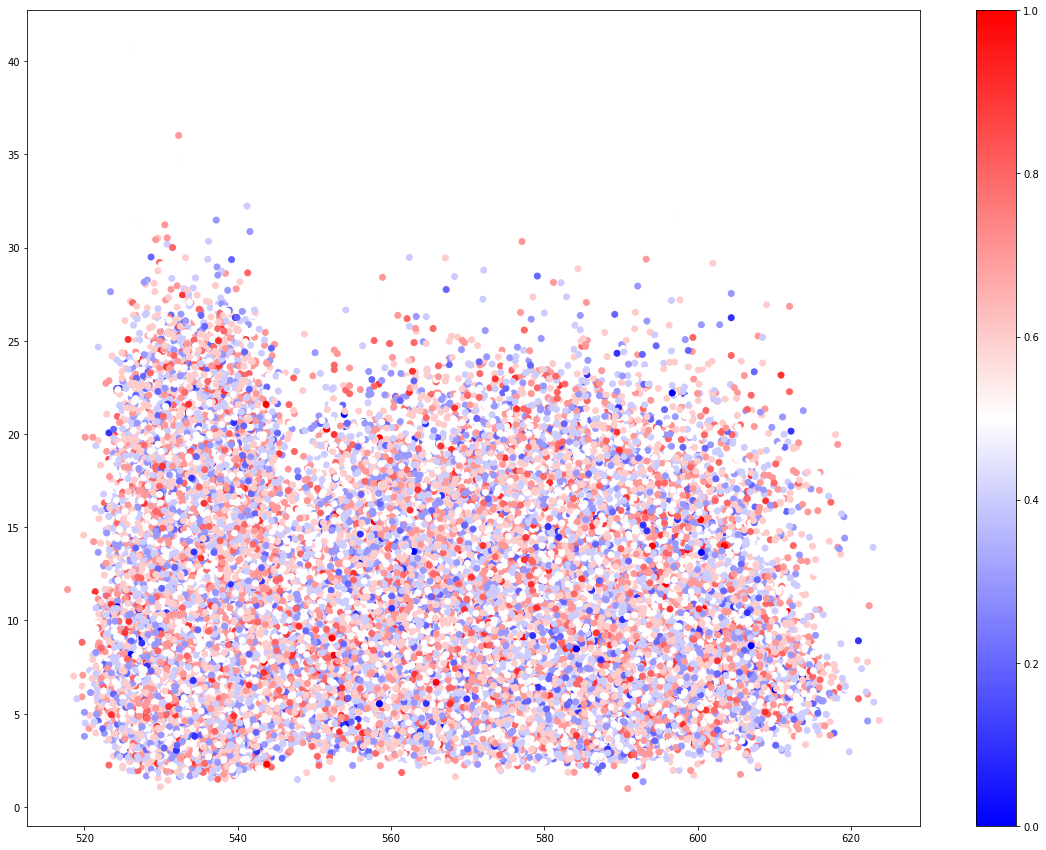

In [51]:
plt.figure(figsize=(20, 15))
plt.scatter(mb, sb, c=mn, cmap='bwr')
plt.colorbar()
plt.show()

In [74]:
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
def get_pixels(filepath, pixels_inds):
    img = Image.open(filepath)
    data = np.array(img).astype(np.uint8).reshape(-1,3)
    
    assert data.shape[0] == 2448*3264
    
    pixels = np.take(data, pixels_inds, axis=0)
    pixels = np.round(np.mean(pixels, axis=1))
    return pixels

In [135]:
mydir = 'C:\\Users\\jurg96\\jurg96-windows\\Фото с айфона'

pics = [os.path.join(mydir, filepath) for filepath in os.listdir(mydir)]

np.random.seed(7)
pixels_inds = np.random.choice(2448*3264, 50000, replace=False)

counter = 0
all_data = []
for filepath in pics:
    if counter == 200:
        break
    
    try:
        pixels = get_pixels(filepath, pixels_inds)
        all_data.append(pixels)
        counter += 1
    except:
        continue

all_data = np.array(all_data) # shape (100, 10000)

In [136]:
mean_brightness = all_data.mean(axis=0)
std_brightness = all_data.std(axis=0)

noise = all_data % 2
mean_noise = noise.mean(axis=0)

(array([2.000e+00, 2.000e+00, 1.000e+00, 2.000e+01, 2.000e+01, 2.100e+01,
        1.090e+02, 7.500e+01, 1.110e+02, 1.930e+02, 5.460e+02, 4.340e+02,
        5.680e+02, 1.572e+03, 1.025e+03, 1.235e+03, 1.479e+03, 3.613e+03,
        2.166e+03, 2.365e+03, 5.068e+03, 2.733e+03, 2.781e+03, 2.740e+03,
        5.076e+03, 2.340e+03, 2.225e+03, 3.700e+03, 1.537e+03, 1.323e+03,
        1.093e+03, 1.527e+03, 5.760e+02, 4.650e+02, 5.960e+02, 2.030e+02,
        1.410e+02, 1.060e+02, 1.270e+02, 2.600e+01, 2.400e+01, 2.100e+01,
        7.000e+00, 5.000e+00, 3.000e+00]),
 array([0.365     , 0.37144444, 0.37788889, 0.38433333, 0.39077778,
        0.39722222, 0.40366667, 0.41011111, 0.41655556, 0.423     ,
        0.42944444, 0.43588889, 0.44233333, 0.44877778, 0.45522222,
        0.46166667, 0.46811111, 0.47455556, 0.481     , 0.48744444,
        0.49388889, 0.50033333, 0.50677778, 0.51322222, 0.51966667,
        0.52611111, 0.53255556, 0.539     , 0.54544444, 0.55188889,
        0.55833333, 0.56477778,

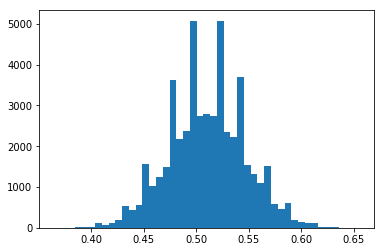

In [143]:
plt.hist(mean_noise, bins=45)

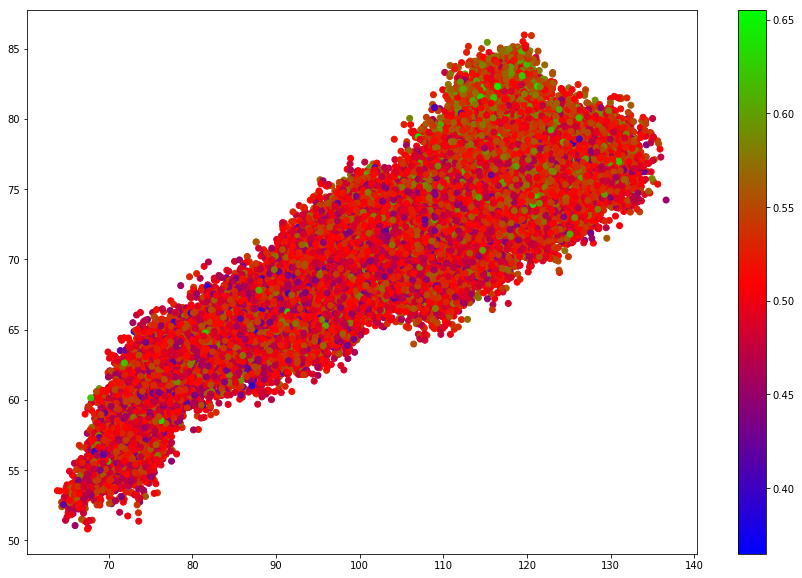

In [139]:
plt.figure(figsize=(15, 10))
plt.scatter(mean_brightness, std_brightness, c=mean_noise, cmap='brg')
plt.colorbar()
plt.show()